# Logística

## Definição dos Atributos

**ID_Produto**: Identificador único de cada produto. Esse campo permite rastrear as demandas e entregas associadas a produtos específicos, essencial para gerenciar o estoque e analisar a popularidade de cada item.

**Data_Entrega**: Data prevista para a entrega do produto. Esse campo é útil para análises de tempo de entrega, agendamento de transporte e controle de estoque em períodos específicos.

**Quantidade_Demandada**: Número de unidades do produto solicitadas para entrega. Esse valor é crucial para planejar estoques e evitar tanto o excesso quanto a falta de produtos.

**Estoque_Atual**: Quantidade do produto atualmente disponível no estoque. Esse campo permite analisar a disponibilidade e determinar a necessidade de reabastecimento com base na demanda.

**Recomendacao_Reposicao**: Indicador (Sim/Não) que informa se é recomendada a reposição do produto. A reposição é sugerida para produtos com baixa disponibilidade em estoque.

**Capacidade_Armazem**: Capacidade total de armazenamento do armazém onde o produto está localizado. Esse valor ajuda a entender os limites de armazenamento e a planejar expansões, se necessário.

**Espaco_Disponivel**: Quantidade de espaço disponível no armazém para novos itens. Esse campo é útil para prever a necessidade de reorganização ou expansão do armazenamento.

**Rota_Entrega**: Identificação da rota utilizada para a entrega do produto. As rotas, nomeadas como Rota A, Rota B, etc., permitem monitorar e otimizar os percursos para reduzir custos e tempo de entrega.

**Distancia_km**: Distância, em quilômetros, entre o armazém e o destino final. Esse campo permite analisar a eficiência das rotas de entrega e ajustar percursos para reduzir distâncias percorridas.

**Tempo_Entrega_horas**: Tempo previsto, em horas, para a entrega do produto. O tempo de entrega é útil para medir a eficiência de cada rota e identificar possíveis gargalos.

**Custo_Entrega**: Custo estimado para a entrega. Esse valor é fundamental para entender o impacto financeiro das entregas e ajustar estratégias de otimização de custos.

**Atraso_Entrega**: Indica se houve atraso na entrega (Verdadeiro/Falso). Esse campo permite identificar entregas fora do prazo e investigar causas para mitigar atrasos futuros.

**Desvio_Rota**: Indica se houve um desvio de rota durante a entrega (Verdadeiro/Falso). Esse campo ajuda a detectar anomalias no transporte e a evitar desvios indesejados que possam aumentar custos ou atrasos.

## Pipeline

O pipeline em ciência de dados é uma sequência de etapas estruturadas para coletar, processar, e analisar dados com o objetivo de obter insights e modelos preditivos. Esse fluxo de trabalho organiza e padroniza o processo, aumentando a eficiência e facilitando a manutenção e a escalabilidade dos projetos de ciência de dados.

Etapa 01: Instalar e Importar as Bibliotecas

Etapa 02: Obter o Datasource

Etapa 03: Exibir os Dados, Metadados e Estatísticas

Etapa 04: Extract, Transform, Load (ETL)

Etapa 05: Exploratory Data Analysis (EDA)

Etapa 06: Identificação e Remoção dos Outliers

Etapa 07: Preprocess

Etapa 08: Balanceamento dos Dados

Etapa 09: Separação dos Dados para Treinamento/Teste e Validação

Etapa 10: Treinamento dos Modelos

Etapa 11: Produção

In [1]:
# Importar bibliotecas
try:
  import gdown
except ImportError:
  !pip install gdown
  import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Etapa 2: Obter o Datasource

In [2]:
# Atribuir ID do arquivo no Google Drive
file_id = '1agvq4BCw3Q8OSmkMjPQRYfctW5kvhJ_Y'
dataset_url = f'https://drive.google.com/uc?id={file_id}'

# Definir nome do arquivo
output_path = 'logistica.csv'

# Baixar o arquivo usando gdown
gdown.download(dataset_url, output_path, quiet=False)

# Carregar o arquivo CSV em um DataFrame, especificando o separador como ponto-e-vírgula
dataset = pd.read_csv(output_path, sep=';')

Downloading...
From: https://drive.google.com/uc?id=1agvq4BCw3Q8OSmkMjPQRYfctW5kvhJ_Y
To: /content/logistica.csv
100%|██████████| 76.9k/76.9k [00:00<00:00, 56.0MB/s]


## Etapa 3: Exibir os Dados, Metadados e Estatísticas

In [3]:
# Exibir o DataFrame
print("Dados do Dataset:")
print(dataset.head().to_string())

Dados do Dataset:
   ID_Produto Data_Entrega  Quantidade_Demandada  Estoque_Atual Recomendacao_Reposicao  Capacidade_Armazem  Espaco_Disponivel Rota_Entrega  Distancia_km  Tempo_Entrega_horas  Custo_Entrega  Atraso_Entrega  Desvio_Rota
0         272   2023-08-05                 407.0            984                    Não               17968               1864       Rota D        387.75                12.27          94.25           False        False
1         147   2023-09-30                 383.0            778                    Não               11776               1392       Rota B        100.11                 5.07         340.85            True        False
2         217   2023-12-22                 348.0            121                    Sim               12661                871       Rota B        211.59                12.00         125.82           False        False
3         292   2023-06-17                 314.0            299                    Não                5288    

In [4]:
# Obter informações gerais do dataset
print("Informações Gerais do Dataset:")
print(dataset.info())

Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Produto              1000 non-null   int64  
 1   Data_Entrega            1000 non-null   object 
 2   Quantidade_Demandada    950 non-null    float64
 3   Estoque_Atual           1000 non-null   int64  
 4   Recomendacao_Reposicao  1000 non-null   object 
 5   Capacidade_Armazem      1000 non-null   int64  
 6   Espaco_Disponivel       1000 non-null   int64  
 7   Rota_Entrega            1000 non-null   object 
 8   Distancia_km            1000 non-null   float64
 9   Tempo_Entrega_horas     950 non-null    float64
 10  Custo_Entrega           1000 non-null   float64
 11  Atraso_Entrega          1000 non-null   bool   
 12  Desvio_Rota             1000 non-null   bool   
dtypes: bool(2), float64(4), int64(4), object(3)
memory usage: 88.0+

In [5]:
# Exibir o número de linhas e colunas
print("Dimensões do Dataset (Linhas, Colunas):")
print(dataset.shape)

Dimensões do Dataset (Linhas, Colunas):
(1000, 13)


In [6]:
# Exibir o nome das colunas
print("Nomes das Colunas:")
print(dataset.columns.tolist())

Nomes das Colunas:
['ID_Produto', 'Data_Entrega', 'Quantidade_Demandada', 'Estoque_Atual', 'Recomendacao_Reposicao', 'Capacidade_Armazem', 'Espaco_Disponivel', 'Rota_Entrega', 'Distancia_km', 'Tempo_Entrega_horas', 'Custo_Entrega', 'Atraso_Entrega', 'Desvio_Rota']


In [7]:
# Checar dados ausentes por coluna
print("Dados Ausentes por Coluna:")
print(dataset.isnull().sum())

Dados Ausentes por Coluna:
ID_Produto                 0
Data_Entrega               0
Quantidade_Demandada      50
Estoque_Atual              0
Recomendacao_Reposicao     0
Capacidade_Armazem         0
Espaco_Disponivel          0
Rota_Entrega               0
Distancia_km               0
Tempo_Entrega_horas       50
Custo_Entrega              0
Atraso_Entrega             0
Desvio_Rota                0
dtype: int64


In [8]:
# Exibir tipos de dados de cada coluna
print("Tipos de Dados das Colunas:")
print(dataset.dtypes)

Tipos de Dados das Colunas:
ID_Produto                  int64
Data_Entrega               object
Quantidade_Demandada      float64
Estoque_Atual               int64
Recomendacao_Reposicao     object
Capacidade_Armazem          int64
Espaco_Disponivel           int64
Rota_Entrega               object
Distancia_km              float64
Tempo_Entrega_horas       float64
Custo_Entrega             float64
Atraso_Entrega               bool
Desvio_Rota                  bool
dtype: object


In [9]:
# Exibir estatísticas descritivas para colunas numéricas
print("Estatísticas Descritivas das Colunas Numéricas:")
print(dataset.describe().to_string())

Estatísticas Descritivas das Colunas Numéricas:
        ID_Produto  Quantidade_Demandada  Estoque_Atual  Capacidade_Armazem  Espaco_Disponivel  Distancia_km  Tempo_Entrega_horas  Custo_Entrega
count  1000.000000            950.000000    1000.000000          1000.00000        1000.000000   1000.000000           950.000000    1000.000000
mean    302.946000            258.904211     500.731000         12429.85800        1016.109000    280.300700             7.805821     560.021630
std     115.281043            189.917425     290.346399          4439.29097         581.016293    179.061125             3.907046     416.159319
min     100.000000              1.000000       0.000000          5004.00000           0.000000     10.460000             1.030000      50.020000
25%     205.000000            124.000000     255.750000          8553.75000         503.750000    149.832500             4.445000     315.527500
50%     298.500000            253.000000     499.500000         12291.50000       

In [10]:
# Exibir domínios por coluna para colunas categóricas
print("Domínios por Coluna Categórica:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col}: {dataset[col].nunique()} valores únicos")

Domínios por Coluna Categórica:
Data_Entrega: 342 valores únicos
Recomendacao_Reposicao: 2 valores únicos
Rota_Entrega: 4 valores únicos


In [11]:
# Exibir domínios por coluna para colunas categóricas, excluindo a coluna 'Nome'
print("Valores únicos dos domínios por Coluna Categórica:")
for col in dataset.select_dtypes(include=['object']).columns:
  if col != 'Nome':
    print(f"Valores únicos da coluna '{col}':")
    print(dataset[col].unique())

Valores únicos dos domínios por Coluna Categórica:
Valores únicos da coluna 'Data_Entrega':
['2023-08-05' '2023-09-30' '2023-12-22' '2023-06-17' '2023-06-07'
 '2023-03-07' '2023-10-07' '2023-07-20' '2023-03-29' '2023-10-21'
 '2023-08-06' '2023-12-12' '2023-05-15' '2023-04-12' '2023-10-25'
 '2023-02-13' '2023-04-21' '2023-08-28' '2023-10-06' '2023-01-12'
 '2023-04-30' '2023-10-10' '2023-02-18' '2023-07-19' '2023-07-02'
 '2023-04-07' '2023-12-23' '2023-12-05' '2023-01-03' '2023-09-22'
 '2023-09-24' '2023-09-19' '2023-10-22' '2023-04-11' '2023-04-28'
 '2023-03-01' '2023-06-14' '2023-02-08' '2023-06-13' '2023-03-30'
 '2023-07-27' '2023-12-07' '2023-09-23' '2023-05-13' '2023-01-25'
 '2023-04-05' '2023-12-06' '2023-03-19' '2023-09-25' '2023-03-23'
 '2023-06-04' '2023-06-25' '2023-04-09' '2023-01-22' '2023-06-20'
 '2023-05-26' '2023-09-02' '2023-07-03' '2023-07-16' '2023-04-22'
 '2023-08-15' '2023-04-08' '2023-08-27' '2023-01-26' '2023-12-18'
 '2023-10-29' '2023-09-20' '2023-03-31' '2023-12-1

## Etapa 4: Extract, Transform, Load (ETL)

In [12]:
# Preencher valores nulos com a média para colunas numéricas
for i in range(dataset.shape[1]):
  if pd.api.types.is_numeric_dtype(dataset.iloc[:, i]):
    dataset.iloc[:, i] = dataset.iloc[:, i].fillna(dataset.iloc[:, i].mean())

# Preencher valores nulos com a moda para colunas categóricas
for i in range(dataset.shape[1]):
  if pd.api.types.is_string_dtype(dataset.iloc[:, i]):
    dataset.iloc[:, i] = dataset.iloc[:, i].fillna(dataset.iloc[:, i].mode()[0])

In [13]:
# Checar dados ausentes por coluna
print("Dados Ausentes por Coluna:")
print(dataset.isnull().sum())

Dados Ausentes por Coluna:
ID_Produto                0
Data_Entrega              0
Quantidade_Demandada      0
Estoque_Atual             0
Recomendacao_Reposicao    0
Capacidade_Armazem        0
Espaco_Disponivel         0
Rota_Entrega              0
Distancia_km              0
Tempo_Entrega_horas       0
Custo_Entrega             0
Atraso_Entrega            0
Desvio_Rota               0
dtype: int64


## Etapa 5: Exploratory Data Analysis (EDA)

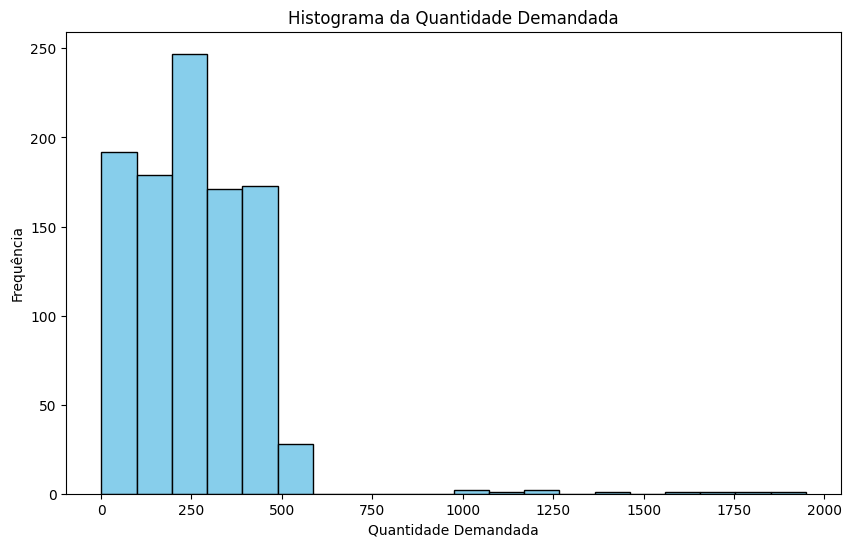

In [14]:
# Criar um histograma para a coluna 'Quantidade_Demandada'
plt.figure(figsize=(10, 6))
plt.hist(dataset['Quantidade_Demandada'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da Quantidade Demandada')
plt.xlabel('Quantidade Demandada')
plt.ylabel('Frequência')
plt.show()

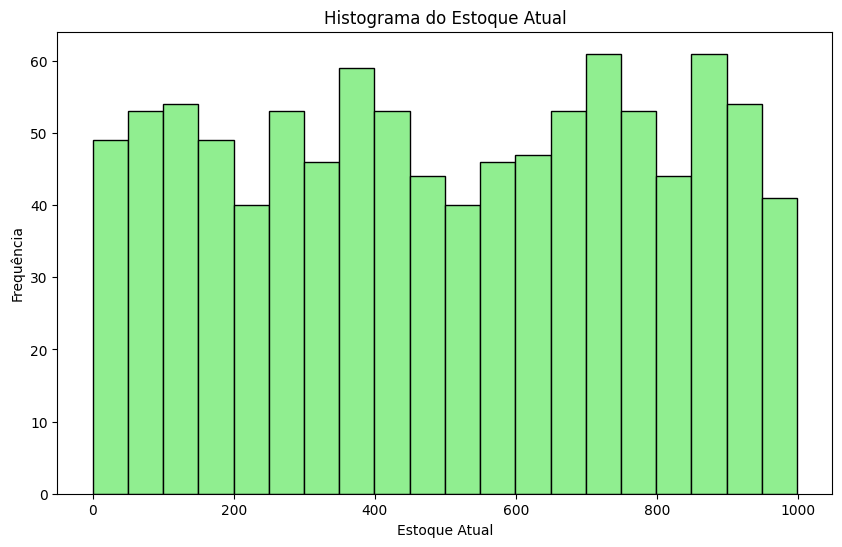

In [15]:
# Criar um histograma para a coluna 'Estoque_Atual'
plt.figure(figsize=(10, 6))
plt.hist(dataset['Estoque_Atual'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma do Estoque Atual')
plt.xlabel('Estoque Atual')
plt.ylabel('Frequência')
plt.show()

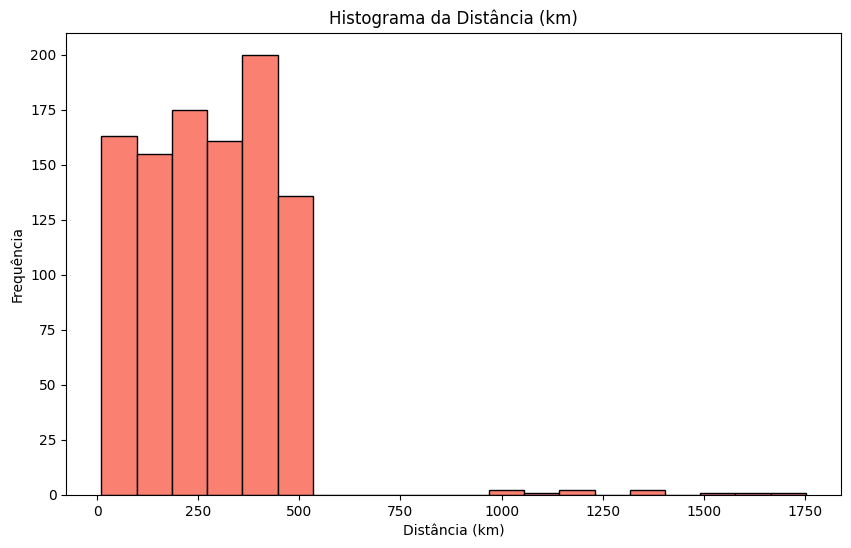

In [16]:
# Criar um histograma para a coluna 'Distancia_km'
plt.figure(figsize=(10, 6))
plt.hist(dataset['Distancia_km'], bins=20, color='salmon', edgecolor='black')
plt.title('Histograma da Distância (km)')
plt.xlabel('Distância (km)')
plt.ylabel('Frequência')
plt.show()

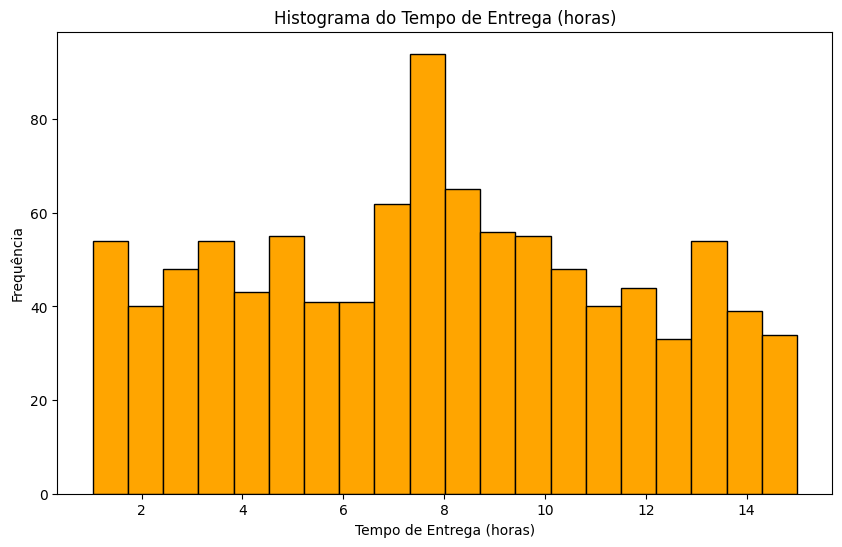

In [17]:
# Criar um histograma para a coluna 'Tempo_Entrega_horas'
plt.figure(figsize=(10, 6))
plt.hist(dataset['Tempo_Entrega_horas'], bins=20, color='orange', edgecolor='black')
plt.title('Histograma do Tempo de Entrega (horas)')
plt.xlabel('Tempo de Entrega (horas)')
plt.ylabel('Frequência')
plt.show()

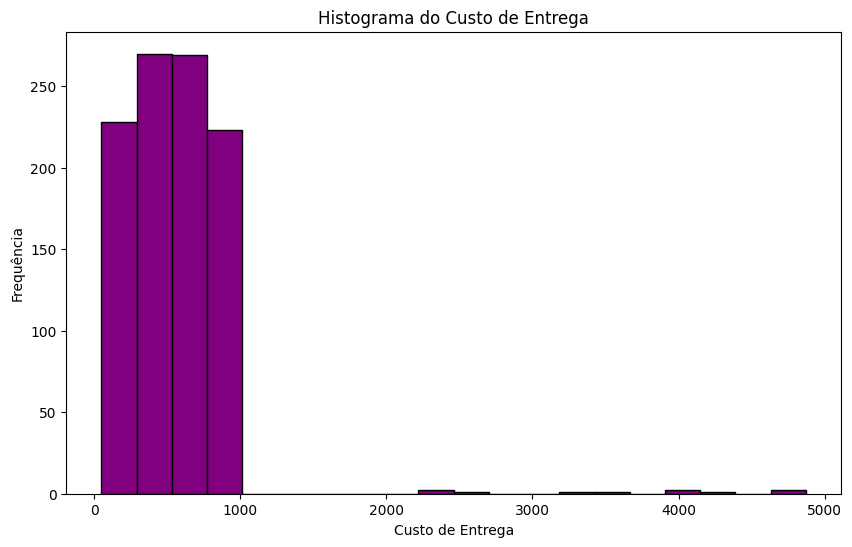

In [18]:
# Criar um histograma para a coluna 'Custo_Entrega'
plt.figure(figsize=(10, 6))
plt.hist(dataset['Custo_Entrega'], bins=20, color='purple', edgecolor='black')
plt.title('Histograma do Custo de Entrega')
plt.xlabel('Custo de Entrega')
plt.ylabel('Frequência')
plt.show()

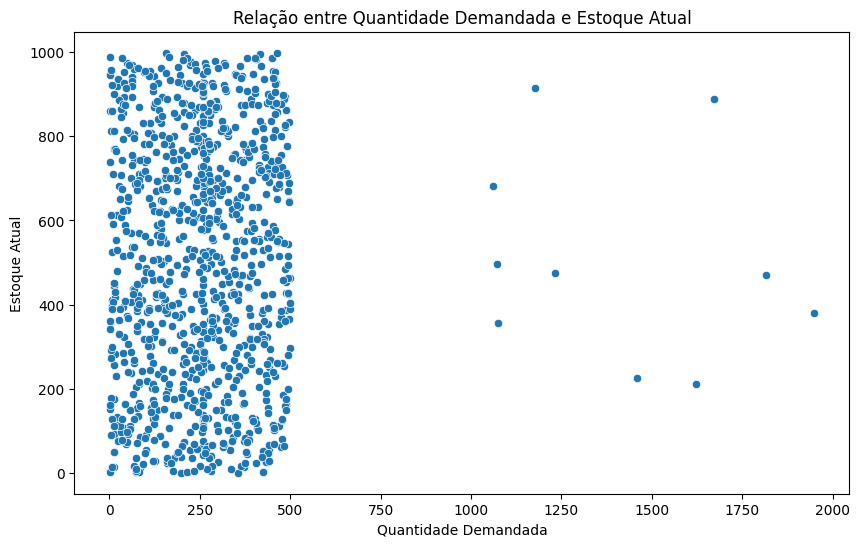

In [19]:
# Gráfico de dispersão entre Quantidade Demandada e Estoque Atual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantidade_Demandada', y='Estoque_Atual', data=dataset)
plt.title('Relação entre Quantidade Demandada e Estoque Atual')
plt.xlabel('Quantidade Demandada')
plt.ylabel('Estoque Atual')
plt.show()

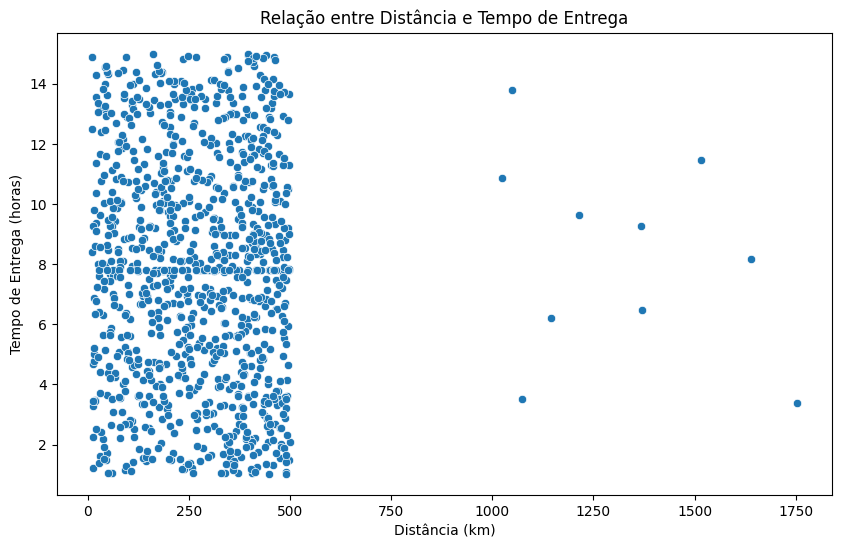

In [20]:
# Gráfico de dispersão entre Distância (km) e Tempo de Entrega (horas)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distancia_km', y='Tempo_Entrega_horas', data=dataset)
plt.title('Relação entre Distância e Tempo de Entrega')
plt.xlabel('Distância (km)')
plt.ylabel('Tempo de Entrega (horas)')
plt.show()

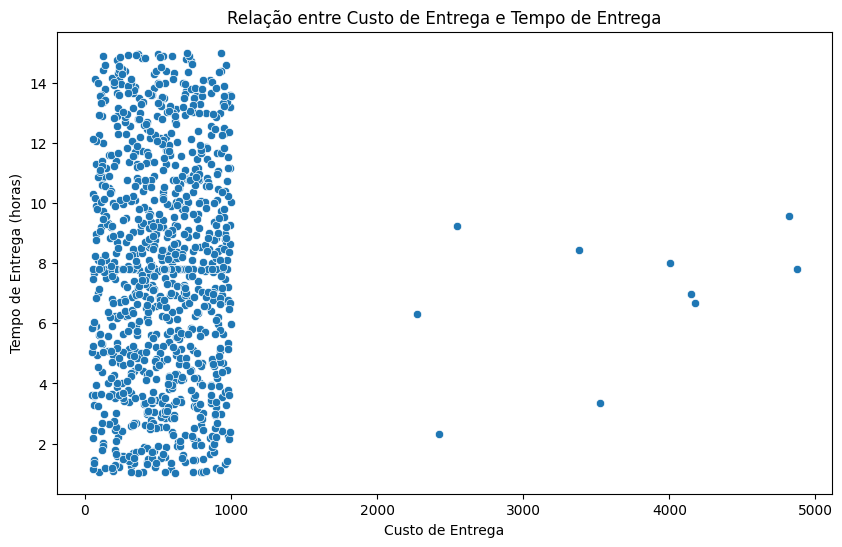

In [21]:
# Gráfico de dispersão entre Custo de Entrega e Tempo de Entrega (horas)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Custo_Entrega', y='Tempo_Entrega_horas', data=dataset)
plt.title('Relação entre Custo de Entrega e Tempo de Entrega')
plt.xlabel('Custo de Entrega')
plt.ylabel('Tempo de Entrega (horas)')
plt.show()

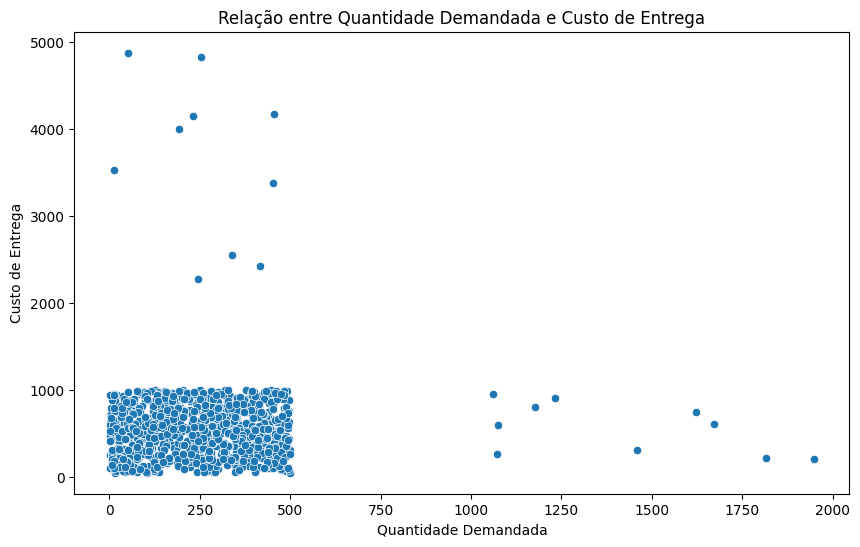

In [22]:
# Gráfico de dispersão entre Quantidade Demandada e Custo de Entrega
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantidade_Demandada', y='Custo_Entrega', data=dataset)
plt.title('Relação entre Quantidade Demandada e Custo de Entrega')
plt.xlabel('Quantidade Demandada')
plt.ylabel('Custo de Entrega')
plt.show()

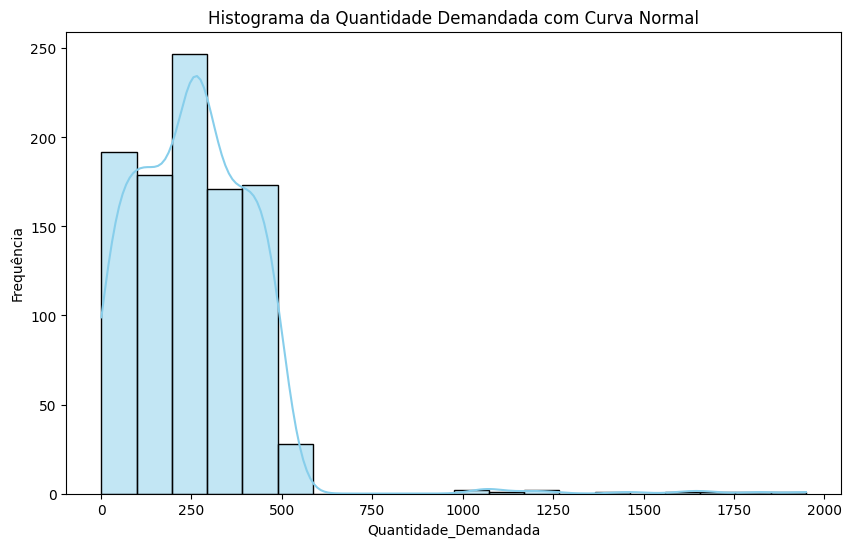

In [23]:
# Plot histogram with normal curve
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Quantidade_Demandada'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da Quantidade Demandada com Curva Normal')
plt.xlabel('Quantidade_Demandada')
plt.ylabel('Frequência')
plt.show()

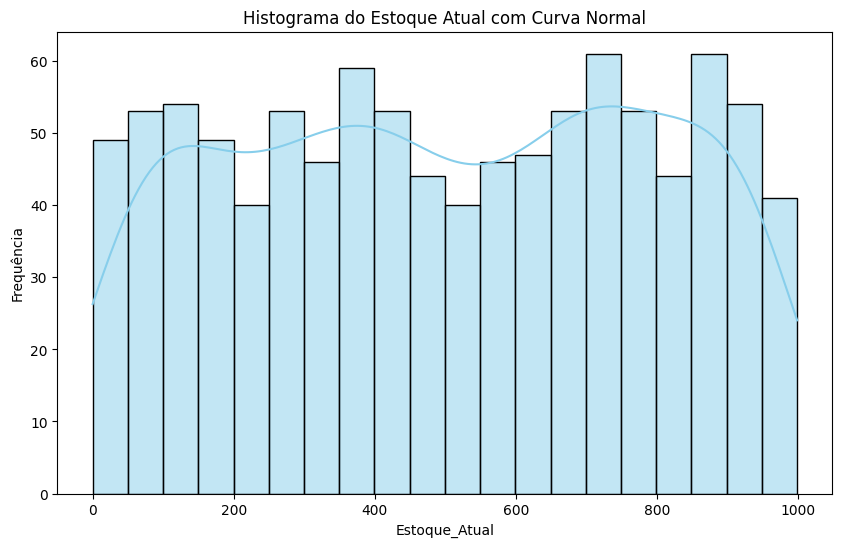

In [24]:
# Plot histogram with normal curve
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Estoque_Atual'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma do Estoque Atual com Curva Normal')
plt.xlabel('Estoque_Atual')
plt.ylabel('Frequência')
plt.show()

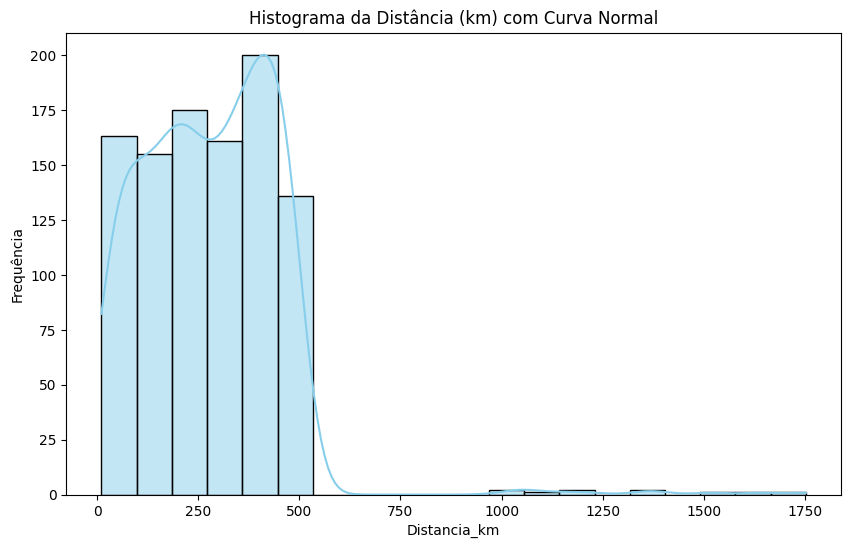

In [25]:
# Plot histogram with normal curve
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Distancia_km'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da Distância (km) com Curva Normal')
plt.xlabel('Distancia_km')
plt.ylabel('Frequência')
plt.show()

Text(0, 0.5, 'Frequência')

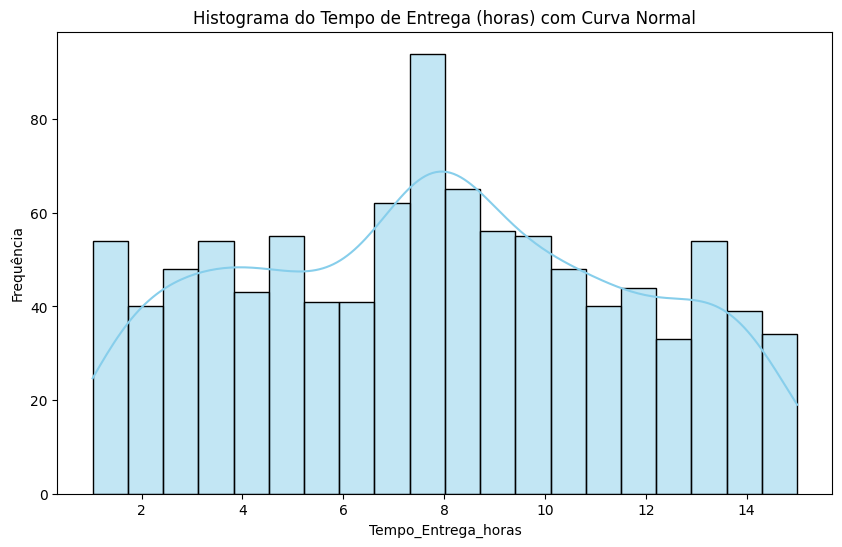

In [26]:
# Plot histogram with normal curve
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Tempo_Entrega_horas'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma do Tempo de Entrega (horas) com Curva Normal')
plt.xlabel('Tempo_Entrega_horas')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

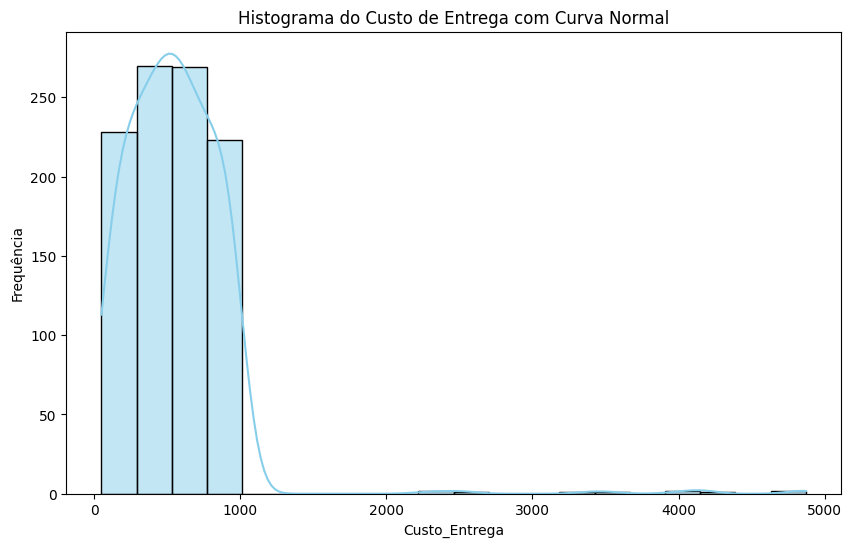

In [27]:
# Plot histogram with normal curve
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Custo_Entrega'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma do Custo de Entrega com Curva Normal')
plt.xlabel('Custo_Entrega')
plt.ylabel('Frequência')

## Etapa 6: Identificação e Remoção dos Outliers

### Calcular Contaminação

**Explicação**: Para calcular o percentual de contaminação de outliers em um dataset, se pode usar o método InterQuartile Range (IQR) que serve para identificar os valores atípicos em cada coluna numérica. O IQR define outliers como valores que estão:

Abaixo de Q1 - 1.5 x IQR

ou

Acima de Q3 + 1.5 x IQR

In [28]:
# Selecionar apenas colunas numéricas
numeric_cols = dataset.select_dtypes(include='number')

# Inicializar contador de outliers
outlier_counts = 0
total_values = numeric_cols.size

# Detectar outliers usando o método IQR para cada coluna numérica
for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    col_outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)][col].count()
    outlier_counts += col_outliers
    print(f"Coluna '{col}' - Outliers: {col_outliers} ({(col_outliers / len(dataset) * 100):.2f}%)")

# Calcular o percentual de contaminação de outliers no dataset
outlier_percentage = (outlier_counts / total_values) * 100

print(f"\nPercentual de contaminação de outliers no dataset: {outlier_percentage:.2f}%")
print(f"Valor de contaminação de outliers no dataset: {outlier_percentage/100:.4f}")

Coluna 'ID_Produto' - Outliers: 0 (0.00%)
Coluna 'Quantidade_Demandada' - Outliers: 10 (1.00%)
Coluna 'Estoque_Atual' - Outliers: 0 (0.00%)
Coluna 'Capacidade_Armazem' - Outliers: 0 (0.00%)
Coluna 'Espaco_Disponivel' - Outliers: 0 (0.00%)
Coluna 'Distancia_km' - Outliers: 10 (1.00%)
Coluna 'Tempo_Entrega_horas' - Outliers: 0 (0.00%)
Coluna 'Custo_Entrega' - Outliers: 10 (1.00%)

Percentual de contaminação de outliers no dataset: 0.38%
Valor de contaminação de outliers no dataset: 0.0037


### Exibição do Boxplot


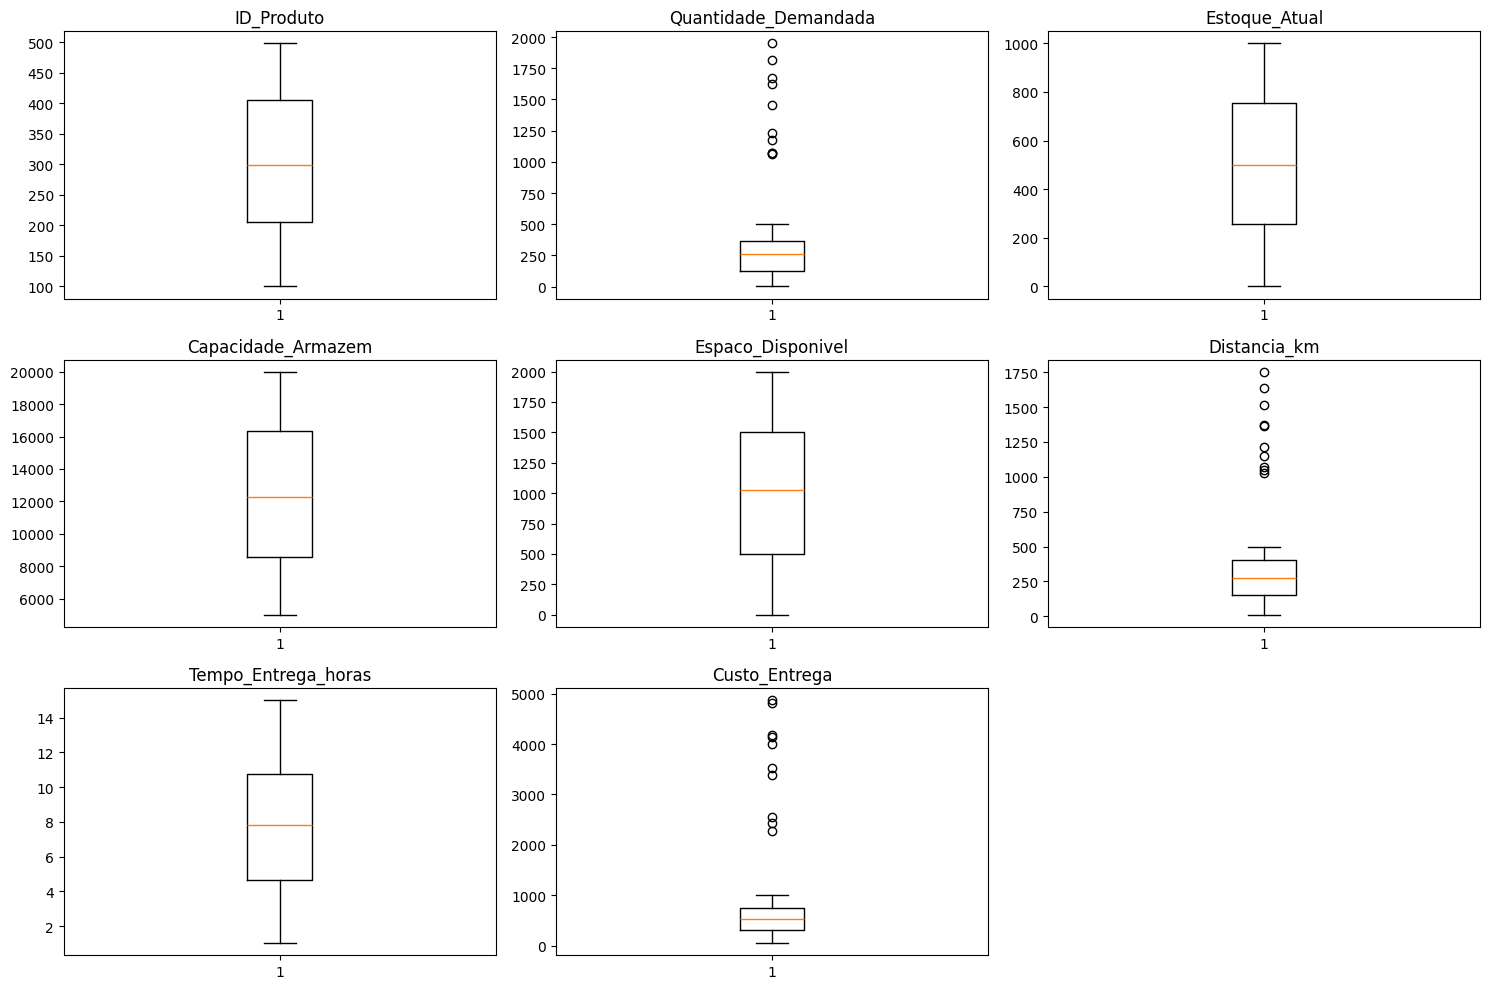

In [29]:
# Criar boxplot para cada coluna numérica para visualizar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(dataset.select_dtypes(include='number').columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(dataset[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Explicação**: Mediana (linha laranja no meio da caixa): representa a mediana do dado analisado, indicando que o 50% dos dados estão abaixo desse valor e 50% estão acima.

Quartis (Q1 e Q3): a parte inferior da caixa representa o primeiro quartil (Q1), que é o valor abaixo do qual estão 25% dos dados e a parte superior da caixa representa o terceiro quartil (Q3), que é o valor abaixo do qual estão 75% dos dados.

Intervalo Interquartil (IQR): é a altura da caixa representa, que representa a diferença entre Q3 e Q1. Esse intervalo cobre os 50% centrais dos dados.

Limites (Bigodes): são as linhas verticais que se estendem até os valores que estão dentro de 1.5 x IQR de Q1 e Q3, sendo os limites para valores considerados "normais", pois os valores fora desses limites são considerados outliers.

Outliers (círculos acima da caixa): serve para indicar que existem outliers, representando dados que estão bem acima da maioria dos demais, sendo assim, considerados valores extremos. Esses pontos representam indivíduos (observações) muito acima do restante do conjunto de dados.

### Visualização da distribuição dos dados outliers e inliers

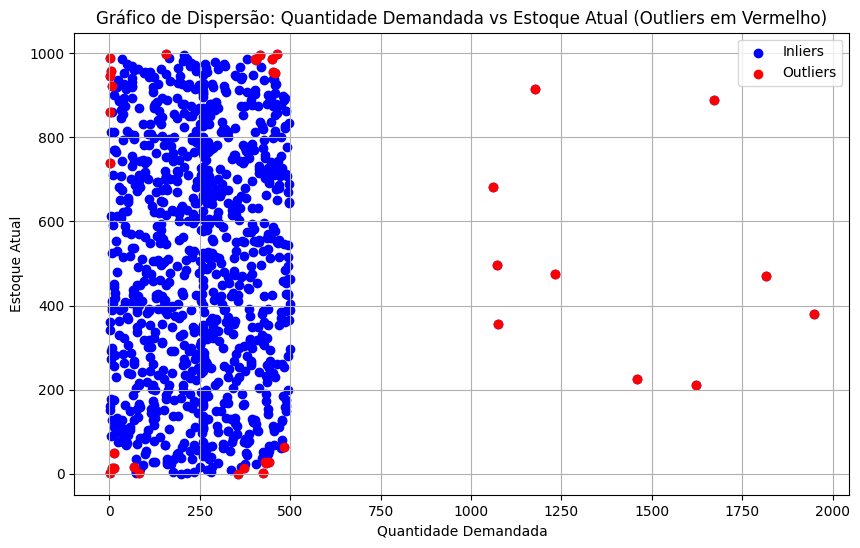

In [30]:
# Criar modelo IsolationForest para detectar outliers
model = IsolationForest(contamination=0.0365)  # Ajustar a contaminação conforme necessário
model.fit(dataset[['Quantidade_Demandada', 'Estoque_Atual']])  # Substitua pelas colunas desejadas

# Prever se cada ponto é um outlier (-1) ou um inlier (1)
outlier_predictions = model.predict(dataset[['Quantidade_Demandada', 'Estoque_Atual']])

# Criar um gráfico de dispersão com os outliers destacados
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Quantidade_Demandada'], dataset['Estoque_Atual'], color='blue', label='Inliers')
plt.scatter(dataset['Quantidade_Demandada'][outlier_predictions == -1], dataset['Estoque_Atual'][outlier_predictions == -1], color='red', label='Outliers')
plt.xlabel('Quantidade Demandada')
plt.ylabel('Estoque Atual')
plt.title('Gráfico de Dispersão: Quantidade Demandada vs Estoque Atual (Outliers em Vermelho)')
plt.legend()
plt.grid(True)
plt.show()

### Separação dos Outliers dos Inliers

In [31]:
# Selecionar apenas colunas numéricas para a detecção de outliers
numeric_data = dataset.select_dtypes(include='number')

# Configurar e aplicar o Isolation Forest com contaminação
iso_forest = IsolationForest(contamination=0.0365, random_state=42)
outlier_labels = iso_forest.fit_predict(numeric_data)

# Adicionar os rótulos de outliers ao dataset
dataset['is_outlier'] = outlier_labels

# Filtrar apenas os outliers (rótulo -1)
outliers = dataset[dataset['is_outlier'] == -1]

# Exibir os dados que são outliers
print("Dados identificados como outliers:")
print(outliers.head().to_string())

# Exibir a quantidade e percentual de outliers detectados
outlier_count = len(outliers)
outlier_percentage = (outlier_count / len(dataset)) * 100
print(f"\nTotal de outliers: {outlier_count} ({outlier_percentage:.2f}%)")

# Exibir informações gerais do dataset
print("\nInformações Gerais do Dataset:")
print(dataset.info())

Dados identificados como outliers:
     ID_Produto Data_Entrega  Quantidade_Demandada  Estoque_Atual Recomendacao_Reposicao  Capacidade_Armazem  Espaco_Disponivel Rota_Entrega  Distancia_km  Tempo_Entrega_horas  Custo_Entrega  Atraso_Entrega  Desvio_Rota  is_outlier
40          498   2023-09-19                 452.0            956                    Não               16367                603       Rota D        181.93                 8.45        3379.73           False        False          -1
57          153   2023-01-22                  81.0            711                    Sim                5293                782       Rota D         58.60                 1.04          94.18           False        False          -1
110         469   2023-06-15                 373.0            745                    Não               11994               1101       Rota C       1516.89                11.46         836.49           False        False          -1
135         327   2023-03-20         

In [32]:
# Remover os outliers
try:
    dataset = dataset[dataset['is_outlier'] == 1].drop(columns=['is_outlier'])
except Exception as e:
    print(f"Ocorreu um erro: {e}")

# Exibir o dataset sem os outliers
print("Dataset sem os outliers:")
print(dataset.head().to_string())

# Exibir informações gerais do dataset
print("\nInformações Gerais do Dataset:")
print(dataset.info())

Dataset sem os outliers:
   ID_Produto Data_Entrega  Quantidade_Demandada  Estoque_Atual Recomendacao_Reposicao  Capacidade_Armazem  Espaco_Disponivel Rota_Entrega  Distancia_km  Tempo_Entrega_horas  Custo_Entrega  Atraso_Entrega  Desvio_Rota
0         272   2023-08-05                 407.0            984                    Não               17968               1864       Rota D        387.75                12.27          94.25           False        False
1         147   2023-09-30                 383.0            778                    Não               11776               1392       Rota B        100.11                 5.07         340.85            True        False
2         217   2023-12-22                 348.0            121                    Sim               12661                871       Rota B        211.59                12.00         125.82           False        False
3         292   2023-06-17                 314.0            299                    Não                5

## Etapa 7: Preprocess

In [33]:
# Definir o target (variável alvo)
target = 'Rota_Entrega'  # Substitua pelo nome da sua coluna alvo

# Definir a meta (o que se pretende atingir com o modelo)
meta = 'ID_Produto'

# Definir as features (variáveis preditivas)
features = ['Quantidade_Demandada', 'Estoque_Atual', 'Capacidade_Armazem', 'Espaco_Disponivel', 'Distancia_km', 'Tempo_Entrega_horas', 'Custo_Entrega']

# Exibir as regras (pode ser ajustado conforme o modelo)
print(f"Regras para o modelo de previsão de reposição de produtos:")
print(f"- Target: {target}")
print(f"- Meta: {meta}")
print(f"- Features:")
for feature in features:
  print(f"  - {feature}")

Regras para o modelo de previsão de reposição de produtos:
- Target: Rota_Entrega
- Meta: ID_Produto
- Features:
  - Quantidade_Demandada
  - Estoque_Atual
  - Capacidade_Armazem
  - Espaco_Disponivel
  - Distancia_km
  - Tempo_Entrega_horas
  - Custo_Entrega


In [34]:
# Separar as features, target e meta
X = dataset[features]
y = dataset[target]
meta_data = dataset[meta]

# Criar o objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar e transformar as features
X_normalized = scaler.fit_transform(X)

# Converter o array numpy para DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=features)

# Exibir os dados normalizados
print("Dados normalizados (sem target e meta):")
print(X_normalized.head().to_string())

Dados normalizados (sem target e meta):
   Quantidade_Demandada  Estoque_Atual  Capacidade_Armazem  Espaco_Disponivel  Distancia_km  Tempo_Entrega_horas  Custo_Entrega
0              0.378378       0.984985            0.864762           0.932933      0.277876             0.805735       0.017712
1              0.356011       0.778779            0.451438           0.696697      0.065893             0.289606       0.116466
2              0.323392       0.121121            0.510513           0.435936      0.148051             0.786380       0.030355
3              0.291705       0.299299            0.018357           0.262763      0.003081             0.419355       0.108292
4              0.019571       0.613614            0.644216           0.309810      0.072223             0.495341       0.218847


## Etapa 8: Balanceamento dos Dados

In [35]:
# Verificar o balanceamento das classes na coluna target
class_counts = dataset[target].value_counts()
print("Contagem de cada classe antes do balanceamento:")
print(class_counts)

# Identificar a classe minoritária
minority_class = class_counts.idxmin()

# Criar uma lista para armazenar os dados balanceados
balanced_data = []

# Para cada classe, realizar o balanceamento (upsampling)
for class_label in dataset[target].unique():
    class_data = dataset[dataset[target] == class_label]

    if len(class_data) < class_counts.max():
        # Upsampling da classe minoritária
        oversampled_data = resample(class_data,
                                     replace=True,  # sample with replacement
                                     n_samples=class_counts.max(),  # match number in majority class
                                     random_state=42)  # reproducible results
        balanced_data.append(oversampled_data)
    else:
        balanced_data.append(class_data)


# Concatenar os dados balanceados em um único DataFrame
balanced_dataset = pd.concat(balanced_data)


# Verificar o balanceamento das classes após o upsampling
class_counts_balanced = balanced_dataset[target].value_counts()
print("\nContagem de cada classe após o balanceamento:")
print(class_counts_balanced)

# Exibir os dados balanceados
print("\nDados balanceados:")
print(balanced_dataset.head().to_string())

Contagem de cada classe antes do balanceamento:
Rota_Entrega
Rota D    250
Rota A    249
Rota B    246
Rota C    218
Name: count, dtype: int64

Contagem de cada classe após o balanceamento:
Rota_Entrega
Rota D    250
Rota B    250
Rota A    250
Rota C    250
Name: count, dtype: int64

Dados balanceados:
    ID_Produto Data_Entrega  Quantidade_Demandada  Estoque_Atual Recomendacao_Reposicao  Capacidade_Armazem  Espaco_Disponivel Rota_Entrega  Distancia_km  Tempo_Entrega_horas  Custo_Entrega  Atraso_Entrega  Desvio_Rota
0          272   2023-08-05            407.000000            984                    Não               17968               1864       Rota D        387.75                12.27          94.25           False        False
7          459   2023-07-20            258.904211            244                    Sim               10836                315       Rota D         30.41                 1.61         670.66           False        False
20         187   2023-01-12           

## Etapa 9: Separação dos Dados para Treinamento/Teste e Validação

In [36]:
# Separar os dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Exibir as dimensões dos conjuntos de treino e teste
print("\nDimensões do conjunto de treino (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste (X_test, y_test):", X_test.shape, y_test.shape)


Dimensões do conjunto de treino (X_train, y_train): (770, 7) (770,)
Dimensões do conjunto de teste (X_test, y_test): (193, 7) (193,)


## Etapa 10: Treinamento dos Modelos

### Support Vector Machine (SVM)

In [37]:
# Criar modelo SVM com hiperparâmetros específicos
svm_model = SVC(
    C=1.0,  # Parâmetro de regularização (custo da classificação incorreta)
    kernel='rbf',  # Kernel para o modelo (radial basis function)
    degree=3,  # Grau do polinômio para o kernel (relevante para kernel='poly')
    gamma='scale',  # Coeficiente do kernel (relevante para kernel='rbf', 'poly', 'sigmoid')
    coef0=0.0,  # Termo independente para o kernel (relevante para kernel='poly', 'sigmoid')
    shrinking=True,  # Utilização do shrinking heuristic para otimizar a solução
    probability=False,  # Calcular probabilidades de classe
    tol=0.001,  # Tolerância para a otimização
    cache_size=200,  # Tamanho do cache em MB
    class_weight=None,  # Pesos para as classes (pode ser usado para lidar com classes desbalanceadas)
    verbose=False,  # Mostrar mensagens durante a execução
    max_iter=200,  # Número máximo de iterações para a otimização (-1 significa ilimitado)
    decision_function_shape='ovr',  # Formato da função de decisão ('ovo' para one-vs-one, 'ovr' para one-vs-rest)
    break_ties=False,  # Quebrar empates com maior precisão (relevante para classificação multiclasse)
    random_state=None  # Semente aleatória para reprodutibilidade
)

# Exibir os hiperparâmetros
print("Hiperparâmetros do modelo SVM:")
print(svm_model.get_params())

Hiperparâmetros do modelo SVM:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 200, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [38]:
# Treinar o modelo SVM com os dados de treinamento
svm_model.fit(X_train, y_train)

# Fazer previsões com o modelo treinado
y_pred_svm = svm_model.predict(X_test)

# Avaliar o desempenho do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("\nDesempenho do Modelo SVM:")
print(f"Acurácia: {accuracy_svm:.4f}")
print(f"Precisão: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")

# Criar a matriz de confusão para o modelo SVM
confusion_svm = confusion_matrix(y_test, y_pred_svm)
print("\nMatriz de Confusão do Modelo SVM:")
confusion_svm


Desempenho do Modelo SVM:
Acurácia: 0.2694
Precisão: 0.2907
Recall: 0.2694
F1-Score: 0.2703

Matriz de Confusão do Modelo SVM:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([[19, 19,  1, 12],
       [19, 11,  7,  8],
       [14, 12, 10,  7],
       [17, 18,  7, 12]])

### Multilayer Perceptron (MLP)

In [39]:
# Criar um modelo MLP com hiperparâmetros específicos
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # Número de neurônios em cada camada oculta
    activation='relu',  # Função de ativação
    solver='adam',  # Algoritmo de otimização
    alpha=0.0001,  # Termo de regularização L2
    batch_size='auto',  # Tamanho do batch para o treinamento
    learning_rate='constant',  # Taxa de aprendizado
    learning_rate_init=0.001,  # Taxa de aprendizado inicial
    power_t=0.5,  # Parâmetro para o algoritmo de otimização 'sgd'
    max_iter=200,  # Número máximo de iterações
    shuffle=True,  # Embaralhar os dados a cada época
    random_state=None,  # Semente aleatória
    tol=0.0001,  # Tolerância para o critério de parada
    verbose=False,  # Mostrar mensagens durante o treinamento
    warm_start=False,  # Reutilizar a solução da inicialização anterior
    momentum=0.9,  # Parâmetro para o algoritmo de otimização 'sgd'
    nesterovs_momentum=True,  # Utilizar o momentum de Nesterov
    early_stopping=False,  # Parar o treinamento precocemente
    validation_fraction=0.1,  # Fração de dados para validação
    beta_1=0.9,  # Parâmetro para o algoritmo de otimização 'adam'
    beta_2=0.999,  # Parâmetro para o algoritmo de otimização 'adam'
    epsilon=1e-08,  # Parâmetro para o algoritmo de otimização 'adam'
    n_iter_no_change=10,  # Número máximo de épocas sem melhoria
    max_fun=15000  # Número máximo de chamadas para a função de custo
)

# Exibir os hiperparâmetros
print("Hiperparâmetros do modelo MLP:")
print(mlp_model.get_params())

Hiperparâmetros do modelo MLP:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [40]:
# Treinar o modelo MLP com os dados de treinamento
mlp_model.fit(X_train, y_train)

# Fazer previsões com o modelo treinado
y_pred_mlp = mlp_model.predict(X_test)

# Avaliar o desempenho do modelo MLP
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print("\nDesempenho do Modelo MLP:")
print(f"Acurácia: {accuracy_mlp:.4f}")
print(f"Precisão: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1-Score: {f1_mlp:.4f}")

# Criar a matriz de confusão para o modelo MLP
confusion_mlp = confusion_matrix(y_test, y_pred_mlp)
print("\nMatriz de Confusão do Modelo MLP:")
confusion_mlp


Desempenho do Modelo MLP:
Acurácia: 0.2798
Precisão: 0.2988
Recall: 0.2798
F1-Score: 0.2828

Matriz de Confusão do Modelo MLP:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[17, 17,  3, 14],
       [18, 12,  8,  7],
       [15, 12, 12,  4],
       [14, 19,  8, 13]])

In [41]:
# Comparação dos modelos SVM e MLP

print("\nComparação de Desempenho:")
print("-----------------------")
print(f"Modelo | Acurácia | Precisão | Recall | F1-Score")
print(f"-------|----------|----------|--------|---------")
print(f"SVM    | {accuracy_svm:.4f} | {precision_svm:.4f} | {recall_svm:.4f} | {f1_svm:.4f}")
print(f"MLP    | {accuracy_mlp:.4f} | {precision_mlp:.4f} | {recall_mlp:.4f} | {f1_mlp:.4f}")

# Escolher o melhor modelo com base nas métricas
if accuracy_svm > accuracy_mlp:
  best_model = "SVM"
  print("\nO melhor modelo com base na acurácia é o SVM.")
elif accuracy_mlp > accuracy_svm:
  best_model = "MLP"
  print("\nO melhor modelo com base na acurácia é o MLP.")
else:
  best_model = "Empate"
  print("\nOs modelos SVM e MLP apresentam acurácia similar.")


Comparação de Desempenho:
-----------------------
Modelo | Acurácia | Precisão | Recall | F1-Score
-------|----------|----------|--------|---------
SVM    | 0.2694 | 0.2907 | 0.2694 | 0.2703
MLP    | 0.2798 | 0.2988 | 0.2798 | 0.2828

O melhor modelo com base na acurácia é o MLP.


In [42]:
# Salvar modelo campeão

if best_model == "SVM":
   filename = 'model.sav'
   pickle.dump(svm_model, open(filename, 'wb'))
elif best_model == "MLP":
   filename = 'model.sav'
   pickle.dump(mlp_model, open(filename, 'wb'))
else:
   filename = 'model.sav'
   pickle.dump(mlp_model, open(filename, 'wb'))

print(f"Modelo salvo em '{filename}'")

Modelo salvo em 'model.sav'


In [43]:
# Carregar modelo salvo

import pickle

# Carregar o modelo salvo
filename = 'model.sav'  # Substitua pelo nome do arquivo do seu modelo salvo
loaded_model = pickle.load(open(filename, 'rb'))

## Etapa 11: Produção

In [44]:
# Exemplo de entrada de dados para testar o modelo
nova_entrada = {
    'Quantidade_Demandada': [50],
    'Estoque_Atual': [100],
    'Capacidade_Armazem': [2000],
    'Espaco_Disponivel': [1500],
    'Distancia_km': [10],
    'Tempo_Entrega_horas': [24],
    'Custo_Entrega': [50]
}

# Criar um DataFrame com os dados de entrada
nova_entrada_df = pd.DataFrame(nova_entrada)

# Normalizar os dados de entrada usando o scaler que foi treinado anteriormente
nova_entrada_normalized = scaler.transform(nova_entrada_df)

# Converter o array numpy para DataFrame
nova_entrada_normalized = pd.DataFrame(nova_entrada_normalized, columns=features)

# Fazer previsões com o modelo treinado (MLP)
previsao = loaded_model.predict(nova_entrada_normalized)

# Exibir a previsão
print("Previsão para a nova entrada:")
print(f"Rota de Entrega prevista: {previsao[0]}")

Previsão para a nova entrada:
Rota de Entrega prevista: Rota D
